# Homework Data Visualization

- Nama: Deni Yuniawan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

# please import as much as you need

In [5]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# melihat data duplikat
df.duplicated().any()

False

# Normal

## 1.
## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

Langkah-langkah:
- Kelompokkan data berdasarkan metode pembayaran dan gunakan fungsi agregasi
yang tepat untuk kasus ini.
- Kemudian, buatlah grafik yang tepat menurutmu

In [9]:
import pandas as pd

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengelompokkan data berdasarkan metode pembayaran dan menghitung jumlah pelanggan
grouped_data = data.groupby('PaymentMethod').size().reset_index(name='jumlah_pelanggan')

print(grouped_data)

               PaymentMethod  jumlah_pelanggan
0  Bank transfer (automatic)              1544
1    Credit card (automatic)              1522
2           Electronic check              2365
3               Mailed check              1612


Dengan menggunakan fungsi agregate count maka pengelompokan seperti diatas

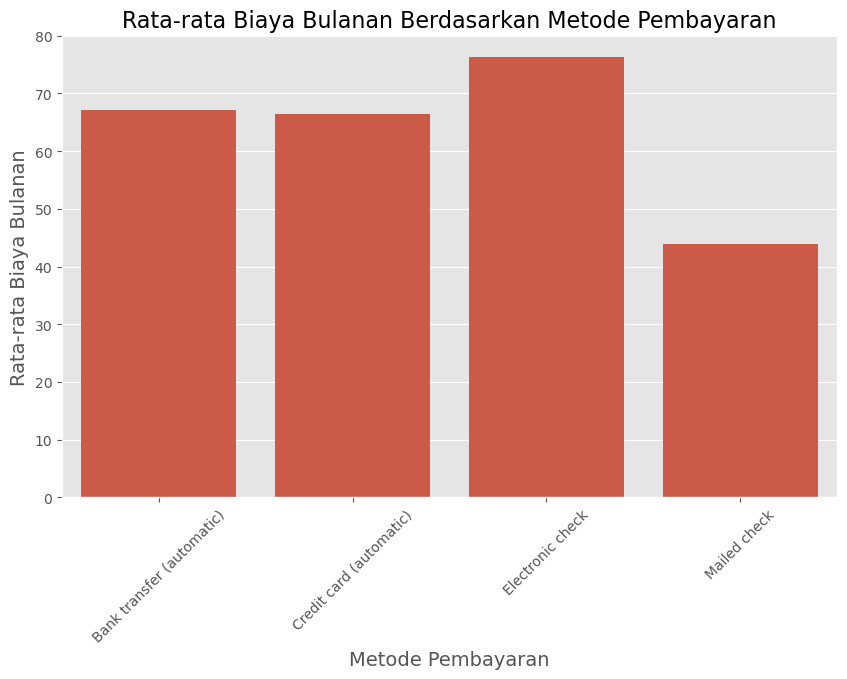

In [15]:
# your code goes here!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengelompokkan data berdasarkan metode pembayaran dan menghitung rata-rata biaya bulanan
grouped_data = data.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()

# Membuat grafik batang dengan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=grouped_data)
plt.title('Rata-rata Biaya Bulanan Berdasarkan Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Rata-rata Biaya Bulanan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
- dari grafik diatas dapat disimpulkan pelanggan yang menggunakan metode pembayaran electronic check memiliki rata-rata biaya bulanan tertinggi.
- Metode pembayaran yang lebih otomatis Metode pembayaran yang lebih otomatis cenderung memiliki rata-rata biaya bulanan yang lebih tinggi. Hal ini mungkin terkait dengan paket layanan atau produk yang lebih besar yang diambil oleh pelanggan yang menggunakan metode pembayaran tersebut.
- Pelanggan yang menggunakan metode pembayaran yang lebih tradisional (seperti cek melalui pos) cenderung memiliki rata-rata biaya bulanan yang lebih rendah, mungkin karena mereka mengambil paket layanan atau produk yang lebih sederhana.
- Perusahaan dapat mempertimbangkan untuk mempromosikan metode pembayaran otomatis kepada pelanggan, karena pelanggan dengan metode pembayaran tersebut cenderung memiliki biaya bulanan yang lebih tinggi.

## 2.
## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

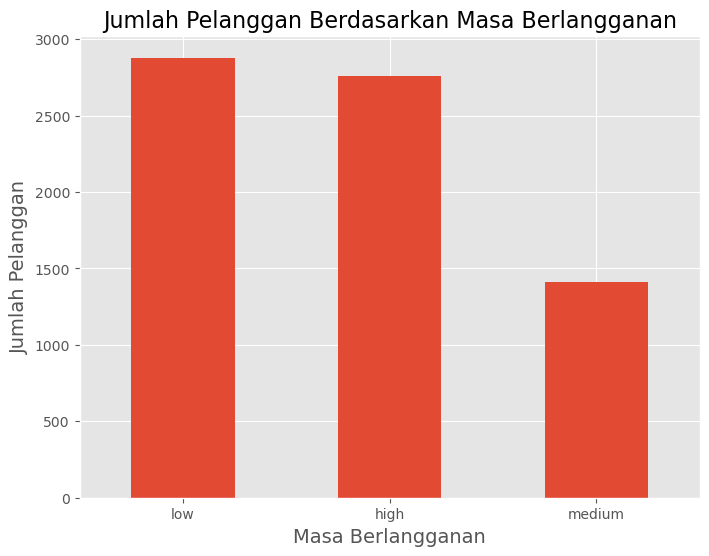

In [16]:
# your code goes here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengelompokkan data berdasarkan tenure
bins = [0, 21, 41, np.inf]
labels = ['low', 'medium', 'high']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)

# Menghitung jumlah pelanggan pada setiap kelompok
tenure_counts = data['tenure_group'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(8, 6))
tenure_counts.plot(kind='bar')
plt.title('Jumlah Pelanggan Berdasarkan Masa Berlangganan', fontsize=16)
plt.xlabel('Masa Berlangganan', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=0)
plt.show()


Jadi, dari plot di atas, kami menyimpulkan bahwa:
- Perusahaan memiliki banyak pelanggan baru yang baru bergabung dalam waktu kurang dari 21 bulan terakhir. Ini menunjukkan bahwa perusahaan berhasil mendapatkan pelanggan baru.
- Jumlah pelanggan dengan masa berlangganan lebih dari 40 bulan juga cukup besar, yang mengindikasikan bahwa perusahaan memiliki basis pelanggan yang loyal dan bertahan lama.
- Namun, jumlah pelanggan dengan masa berlangganan antara 21 hingga 40 bulan relatif lebih sedikit dibandingkan kelompok lainnya. Ini bisa menjadi perhatian bagi perusahaan untuk mempertahankan pelanggan dalam rentang waktu tersebut agar tidak churn (berhenti berlangganan).
- Perusahaan dapat mengembangkan strategi pemasaran dan program loyalitas yang disesuaikan untuk setiap kelompok masa berlangganan, seperti menawarkan diskon atau layanan khusus untuk pelanggan baru, program retensi untuk pelanggan menengah, dan program apresiasi untuk pelanggan loyalis.
- Informasi ini dapat membantu perusahaan dalam memahami pola pelanggan berdasarkan masa berlangganan dan mengembangkan strategi yang tepat untuk menarik pelanggan baru, mempertahankan pelanggan existing, serta meningkatkan loyalitas pelanggan jangka panjang.

## 3.
## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya

In [17]:
import pandas as pd

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengelompokkan data berdasarkan status warga senior dan penggunaan layanan telepon
grouped = data.groupby(['SeniorCitizen', 'PhoneService']).size().reset_index(name='jumlah_pelanggan')

# Menampilkan hasil
print(grouped)

   SeniorCitizen PhoneService  jumlah_pelanggan
0              0           No               578
1              0          Yes              5323
2              1           No               104
3              1          Yes              1038


In [18]:
import pandas as pd

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengelompokkan data berdasarkan status warga senior dan penggunaan layanan telepon
grouped = data.groupby(['SeniorCitizen', 'PhoneService']).size().reset_index(name='jumlah_pelanggan')

# Menghitung total jumlah pelanggan
total_pelanggan = data.shape[0]

# Menambahkan kolom persentase
grouped['persentase'] = (grouped['jumlah_pelanggan'] / total_pelanggan) * 100

# Menampilkan hasil dengan memperhatikan angka rasio
print(grouped[['SeniorCitizen', 'PhoneService', 'jumlah_pelanggan', 'persentase']])

   SeniorCitizen PhoneService  jumlah_pelanggan  persentase
0              0           No               578    8.206730
1              0          Yes              5323   75.578589
2              1           No               104    1.476643
3              1          Yes              1038   14.738038


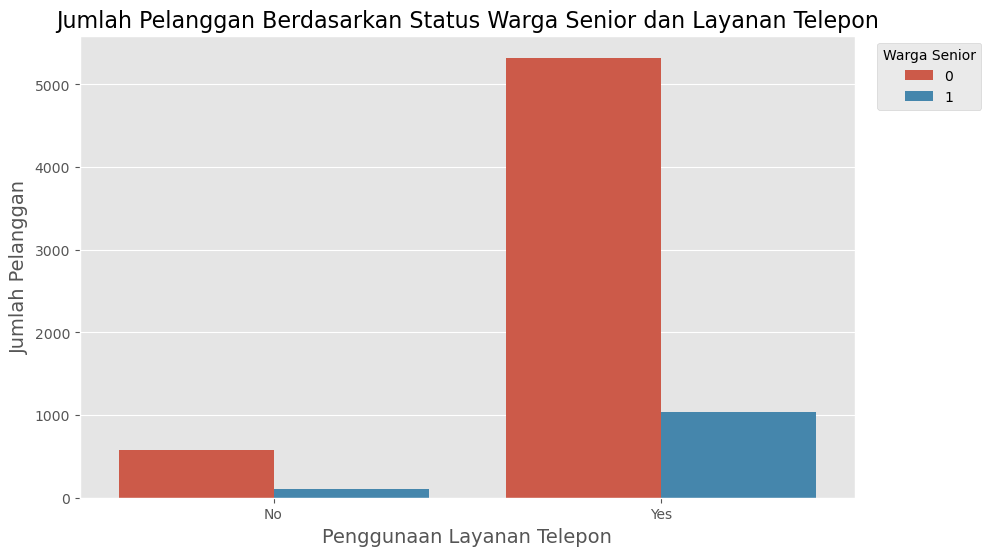

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengelompokkan data berdasarkan status warga senior dan penggunaan layanan telepon
grouped = data.groupby(['SeniorCitizen', 'PhoneService']).size().reset_index(name='jumlah_pelanggan')

# Menghitung total jumlah pelanggan
total_pelanggan = grouped['jumlah_pelanggan'].sum()

# Menambahkan kolom persentase
grouped['persentase'] = (grouped['jumlah_pelanggan'] / total_pelanggan) * 100

# Membuat grafik batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='PhoneService', y='jumlah_pelanggan', hue='SeniorCitizen', data=grouped)
plt.title('Jumlah Pelanggan Berdasarkan Status Warga Senior dan Layanan Telepon', fontsize=16)
plt.xlabel('Penggunaan Layanan Telepon', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.legend(title='Warga Senior', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:

Visualisasi ini mengindikasikan bahwa warga senior cenderung tidak menggunakan layanan telepon, mungkin karena preferensi atau kebutuhan yang berbeda dibandingkan dengan pelanggan yang lebih muda.

## 4.
## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

### distribusi dari total biaya


In [21]:
import pandas as pd
import numpy as np

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Mengubah tipe data kolom TotalCharges menjadi float
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)

# Menampilkan informasi statistik kolom TotalCharges
print(data['TotalCharges'].describe())

# Menampilkan jumlah nilai yang hilang (NaN) pada kolom TotalCharges
print(f"Jumlah nilai yang hilang pada kolom TotalCharges: {data['TotalCharges'].isnull().sum()}")

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
Jumlah nilai yang hilang pada kolom TotalCharges: 11


### Plot Distribusi

In [20]:
# mengubah kolom Total Charges menjadi numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# mengubah nilai nan menjadi 0
df = df.replace(np.nan, 0, regex=True)

# melihat info kolom Total Charges yang telah diubah
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

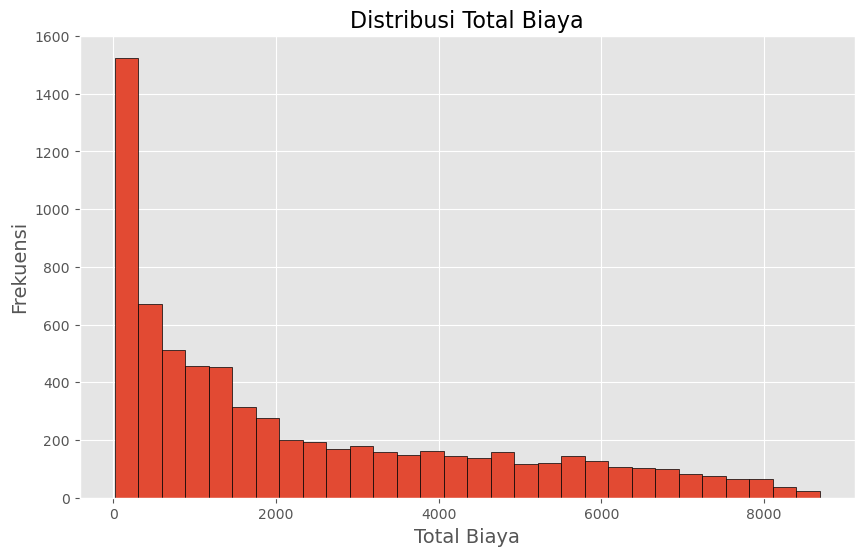

In [22]:
# Menghapus baris dengan nilai NaN pada kolom TotalCharges
data = data[data['TotalCharges'].notnull()]

# Membuat plot distribusi
plt.figure(figsize=(10, 6))
plt.hist(data['TotalCharges'], bins=30, edgecolor='black')
plt.title('Distribusi Total Biaya', fontsize=16)
plt.xlabel('Total Biaya', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
* Terdapat beberapa pelanggan yang membayar total biaya di atas $5000, tetapi jumlahnya relatif sedikit dibandingkan dengan pelanggan yang membayar di bawah 4000.
* Distribusi total biaya cenderung miring ke kanan (right-skewed), yang menunjukkan bahwa sebagian besar pelanggan membayar total biaya yang lebih rendah, sedangkan hanya sebagian kecil pelanggan yang membayar total biaya yang sangat tinggi.

# Intermediate

## 5.
## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data



C:\Users\deniy\AppData\Local\Temp\ipykernel_10224\757260430.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')


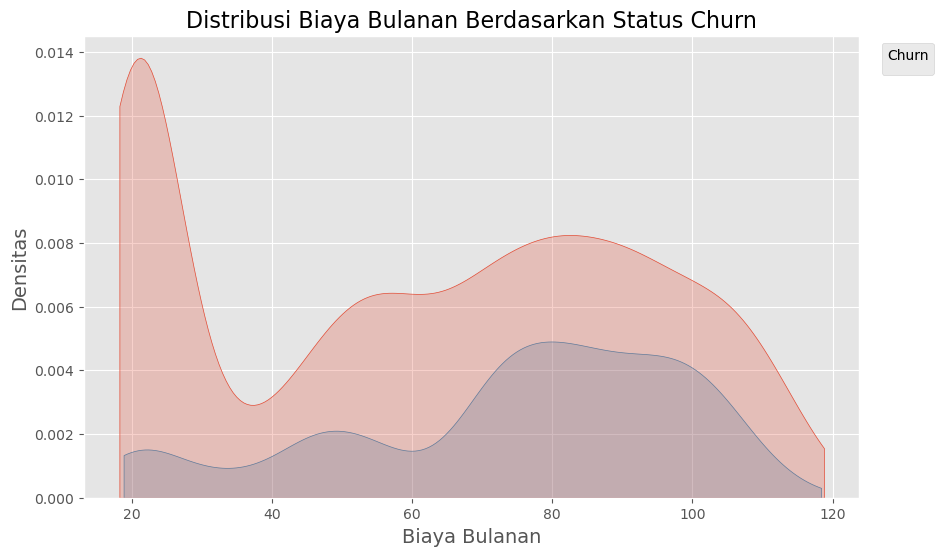

In [23]:
# your code goes here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Membuat plot distribusi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True, cut=0)
plt.title('Distribusi Biaya Bulanan Berdasarkan Status Churn', fontsize=16)
plt.xlabel('Biaya Bulanan', fontsize=14)
plt.ylabel('Densitas', fontsize=14)
plt.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa 
- Distribusi biaya bulanan untuk pelanggan yang tidak churn (garis biru) cenderung miring ke kiri (left-skewed), dengan puncak distribusi berada di sekitar 60-70 per bulan. Ini mengindikasikan bahwa sebagian besar pelanggan yang tidak churn memiliki biaya bulanan yang relatif rendah.
- Di sisi lain, distribusi biaya bulanan untuk pelanggan yang churn (garis coklat) cenderung miring ke kanan (right-skewed), dengan puncak distribusi berada di sekitar 70-80 per bulan. Ini menunjukkan bahwa pelanggan yang churn cenderung memiliki biaya bulanan yang lebih tinggi dibandingkan dengan pelanggan yang tidak churn.
- Meskipun demikian, ada juga sebagian pelanggan yang churn yang memiliki biaya bulanan yang relatif rendah (di bawah 40 per bulan), dan sebaliknya, ada pelanggan yang tidak churn dengan biaya bulanan yang cukup tinggi (di atas 100 per bulan). Ini mengindikasikan bahwa faktor lain seperti kualitas layanan, kepuasan pelanggan, dan lain-lain juga dapat mempengaruhi keputusan pelanggan untuk churn atau tidak.
- Distribusi biaya bulanan untuk pelanggan yang churn memiliki ekor yang lebih panjang ke arah kanan, yang menunjukkan adanya sejumlah kecil pelanggan yang memiliki biaya bulanan yang sangat tinggi (di atas 120 per bulan).
- pelanggan dengan biaya bulanan yang lebih tinggi cenderung memiliki kemungkinan yang lebih besar untuk berhenti berlangganan (churn). Namun, faktor lain juga perlu dipertimbangkan dalam strategi retensi pelanggan.

## 6.
## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

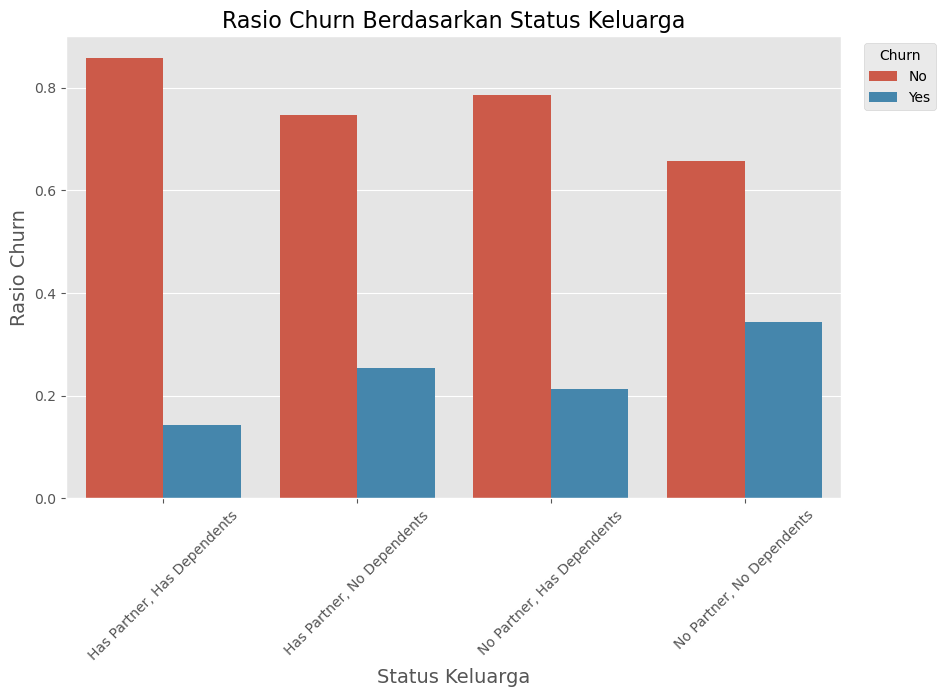

In [24]:
# your code goes here!
# Membuat kolom baru untuk menggabungkan data pasangan dan tanggungan
data['family_status'] = data['Partner'].map({'Yes': 'Has Partner', 'No': 'No Partner'})
data['family_status'] = data['family_status'] + ', ' + data['Dependents'].map({'Yes': 'Has Dependents', 'No': 'No Dependents'})

# Menghitung rasio churn pada setiap kelompok
churn_ratio = data.groupby('family_status')['Churn'].value_counts(normalize=True)
churn_ratio = churn_ratio.rename('churn_ratio').reset_index()

# Membuat plot dengan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='family_status', y='churn_ratio', hue='Churn', data=churn_ratio)
plt.title('Rasio Churn Berdasarkan Status Keluarga', fontsize=16)
plt.xlabel('Status Keluarga', fontsize=14)
plt.ylabel('Rasio Churn', fontsize=14)
plt.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:

Dengan visualisasi ini, kita dapat melihat pengaruh memiliki pasangan dan/atau tanggungan terhadap tingkat churn pelanggan. Kelompok dengan rasio churn yang lebih tinggi mengindikasikan bahwa pelanggan dalam kelompok tersebut cenderung memiliki kemungkinan yang lebih besar untuk berhenti berlangganan.

# Soal Hard

## 7.
## Buatlah insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan memanfaatkan atribut tenure, contract, monthly charges, status*, jumlah pelanggan, dan churn! 

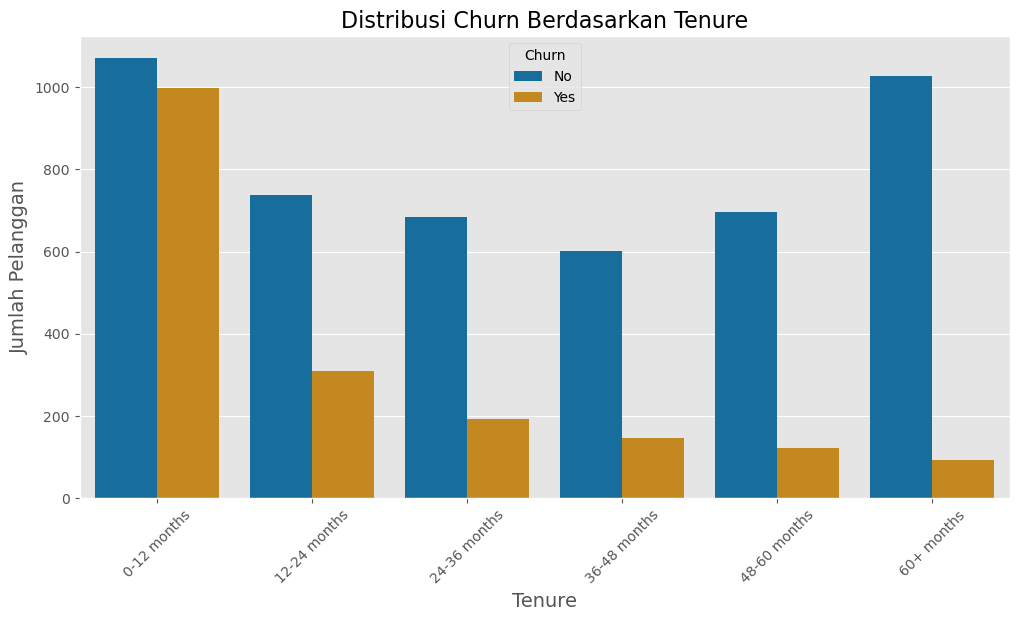

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data CSV
data = pd.read_csv('telco_customer.csv')

# Membuat kolom baru untuk mengelompokkan tenure
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 months', '12-24 months', '24-36 months', '36-48 months', '48-60 months', '60+ months']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)

# Visualisasi: Distribusi Churn berdasarkan Tenure
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='tenure_group', hue='Churn', palette='colorblind', order=labels)
ax.set_title('Distribusi Churn Berdasarkan Tenure', fontsize=16)
ax.set_xlabel('Tenure', fontsize=14)
ax.set_ylabel('Jumlah Pelanggan', fontsize=14)
ax.tick_params(axis='x', rotation=45)
plt.show()


C:\Users\deniy\AppData\Local\Temp\ipykernel_10224\3729835057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(data=data, x='Churn', y='MonthlyCharges', jitter=True, alpha=0.5, palette='colorblind')


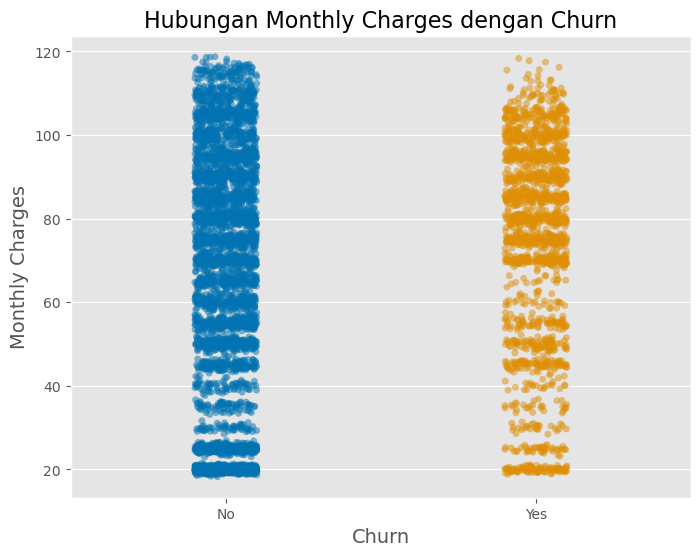

In [26]:
# Visualisasi: Hubungan Monthly Charges dengan Churn
plt.figure(figsize=(8, 6))
ax = sns.stripplot(data=data, x='Churn', y='MonthlyCharges', jitter=True, alpha=0.5, palette='colorblind')
ax.set_title('Hubungan Monthly Charges dengan Churn', fontsize=16)
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Monthly Charges', fontsize=14)
plt.show()